In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
pd.options.mode.chained_assignment = None 

In [114]:
df = pd.read_csv('Cleaned_dataset.csv')

In [115]:
df

,Date,Food Item,Quantity Donated,Quantity Requested,Expiration Date,Seasonality,Holidays,Market Prices,Disaster Events,Recipient Preferences,...,Food Waste Rate,Distance Traveled (km),Transportation Mode,Storage Duration (days),Energy Used in Storage (kWh),Carbon Footprint,Fuel Type,Logistics Cost,Packaging Type,Refrigeration Required
0,1126,3,1.743647,0.008241,1309,-0.217808,-1.087845,-0.207863,1.922821,1.718779,...,0.053643,1.000423,2,1.347030,0.828260,1.085385,1,1.527415,3,-0.596601
1,1459,5,0.003221,-0.480422,1553,-0.272135,0.919249,-1.360160,1.922821,1.718779,...,0.352994,1.606908,1,0.364281,-0.021471,1.020734,1,1.889967,3,-0.596601
2,860,1,1.818024,1.742650,1112,-0.217808,0.919249,-0.002265,-0.407942,0.218121,...,-0.187317,-0.269210,3,1.715560,0.546732,0.590351,0,-0.001418,1,-0.596601
3,1294,3,-1.819020,-1.671107,1598,-0.360425,0.919249,-0.420316,-0.407942,1.343614,...,0.544058,-1.278498,1,0.241437,-0.632946,0.000000,1,-1.251428,0,-0.596601
4,1130,6,-1.759518,-1.292565,1245,-0.321825,0.919249,1.025198,-0.407942,-0.907373,...,3.274009,-0.353682,1,-1.601218,-1.068104,-0.724626,1,-0.779452,2,-0.596601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1401,6,1.699021,2.231312,1553,-0.336377,0.919249,-1.484390,-0.407942,-0.157044,...,4.837954,1.048890,4,-1.724061,-1.091263,0.000000,0,0.564297,1,-0.596601
19996,601,1,-0.718238,-0.432244,923,-0.454627,-1.087845,-0.208292,0.757440,-0.157044,...,-1.060552,0.219876,3,1.715560,3.957795,1.119575,0,0.705790,2,1.676163
19997,342,3,1.587455,0.008241,374,0.156209,0.919249,-0.709053,-0.407942,0.968450,...,-0.407924,0.358229,1,0.364281,-0.374996,0.026523,1,0.379223,3,-0.596601
19998,1797,5,-0.450480,-0.081232,1970,-0.067013,0.919249,1.323525,-0.407942,0.218121,...,0.780215,-1.197990,1,1.101342,-0.292632,-1.154801,1,-0.970529,2,-0.596601


<h1>Feature selection</h1>

<h2>Correlation Matrix</h2>

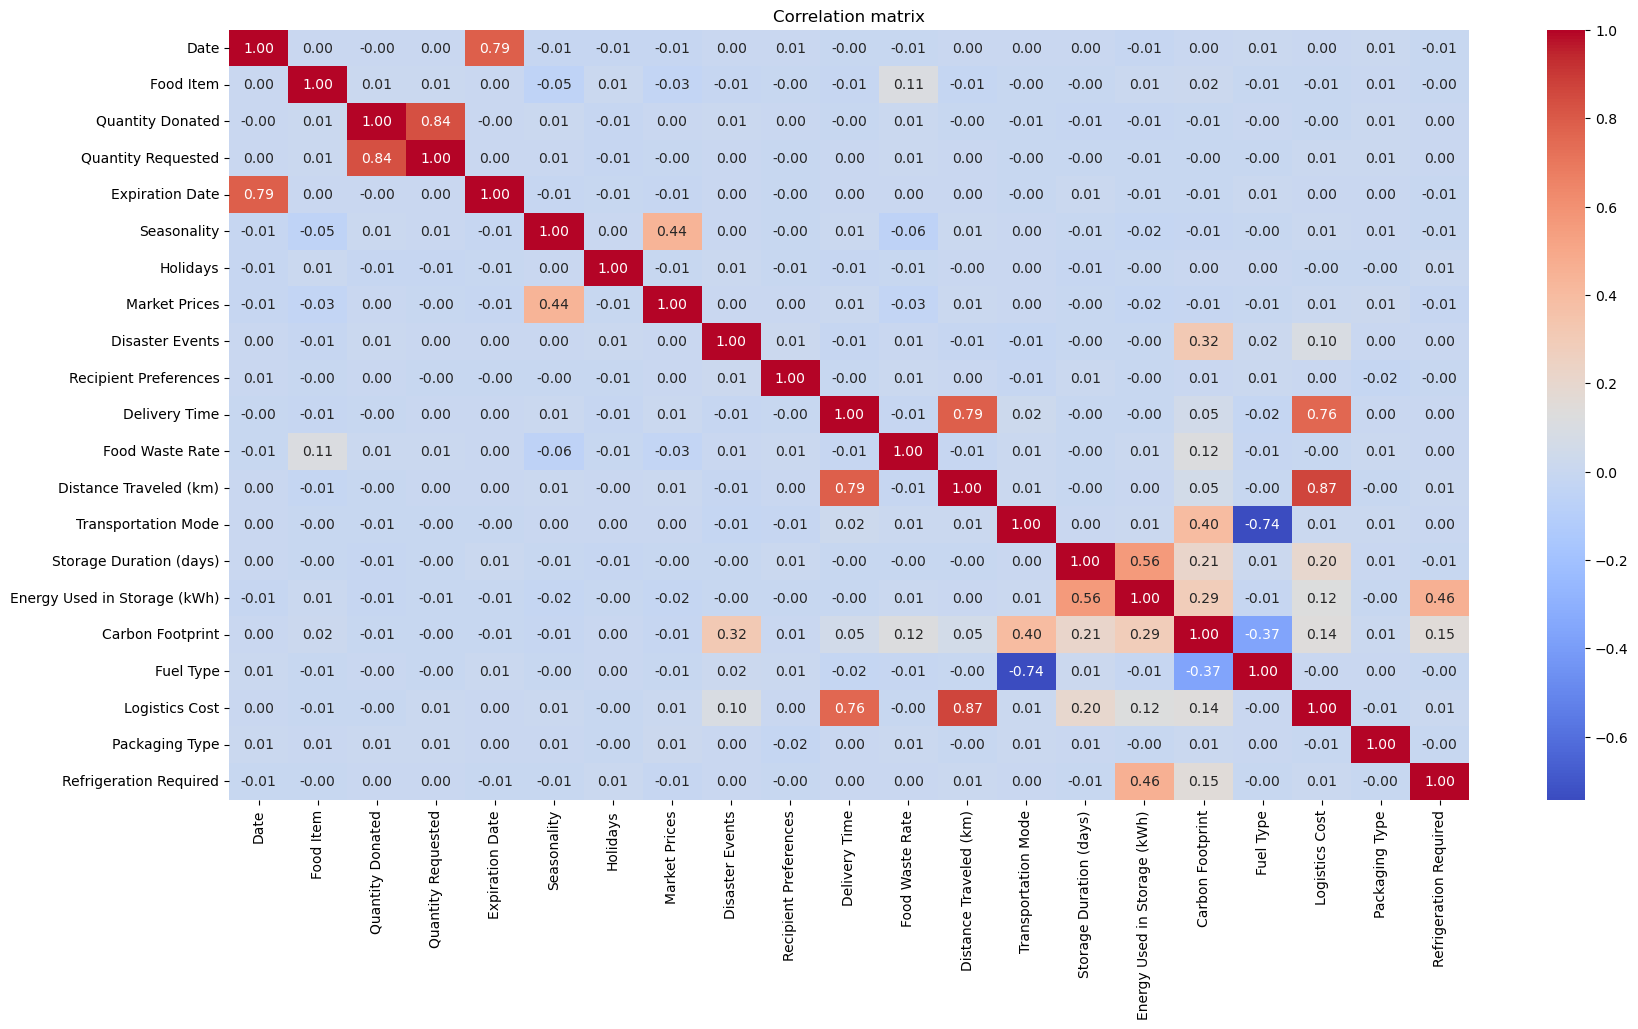

In [116]:
plt.figure(figsize=(20, 10))
corr_matrix = df.corr()  
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation matrix')
plt.show()

In [117]:
# Check for negative values in Quantity Donated
negative_donated = df_clean[df_clean['Quantity Donated'] < 0]
print(f"Number of negative Quantity Donated: {len(negative_donated)}")

# Check for negative values in Quantity Requested
negative_requested = df_clean[df_clean['Quantity Requested'] < 0]
print(f"Number of negative Quantity Requested: {len(negative_requested)}")
print(negative_requested[['Quantity Donated', 'Food Waste Rate', 'Quantity Requested']].describe())

Number of negative Quantity Donated: 8860
Number of negative Quantity Requested: 8799
       Quantity Donated  Food Waste Rate  Quantity Requested
count       8799.000000     8.799000e+03         8799.000000
mean          -0.795273     3.774564e-07           -0.880204
std            0.626407     4.774536e-07            0.551801
min           -1.819020     0.000000e+00           -2.345599
25%           -1.328131     0.000000e+00           -1.278800
50%           -0.837241     0.000000e+00           -0.838315
75%           -0.257099     1.000000e-06           -0.425361
max            0.709804     1.000000e-06           -0.005524


In [118]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create a deep copy of df_clean to avoid SettingWithCopyWarning
df_clean = df_clean.copy()

# Take the absolute value of Quantity Donated, Quantity Requested, and Food Waste Rate
df_clean['Quantity Donated'] = df_clean['Quantity Donated'].abs()
df_clean['Quantity Requested'] = df_clean['Quantity Requested'].abs()
df_clean['Food Waste Rate'] = df_clean['Food Waste Rate'].abs()

# Verify no negative values remain
print("Negative Quantity Donated after transformation:", len(df_clean[df_clean['Quantity Donated'] < 0]))
print("Negative Quantity Requested after transformation:", len(df_clean[df_clean['Quantity Requested'] < 0]))
print("Negative Food Waste Rate after transformation:", len(df_clean[df_clean['Food Waste Rate'] < 0]))

Negative Quantity Donated after transformation: 0
Negative Quantity Requested after transformation: 0
Negative Food Waste Rate after transformation: 0


In [119]:
# Compute correlation
target = 'Quantity Requested'
if target in df.columns:
    corr_matrix = df.corr()  # Compute correlation matrix
    print("\nCorrelation with the target before filtering :")
    print(corr_matrix[target].abs())  

    # Feature selection based on correlation
    correlation_threshold = 0.2  # More reasonable threshold
    target_corr = corr_matrix[target].abs()
    selected_features = target_corr[target_corr > correlation_threshold].index.tolist()
    
    if target in selected_features:
        selected_features.remove(target)

    print(f"\nSelected features correlated with {target} (|corr| > {correlation_threshold}) : \n{selected_features}")


Correlation with the target before filtering :
Date                            0.004821
Food Item                       0.010206
Quantity Donated                0.835271
Quantity Requested              1.000000
Expiration Date                 0.001473
Seasonality                     0.005293
Holidays                        0.013512
Market Prices                   0.004159
Disaster Events                 0.001727
Recipient Preferences           0.000777
Delivery Time                   0.004516
Food Waste Rate                 0.007239
Distance Traveled (km)          0.004632
Transportation Mode             0.002361
Storage Duration (days)         0.004764
Energy Used in Storage (kWh)    0.006179
Carbon Footprint                0.001251
Fuel Type                       0.001691
Logistics Cost                  0.007004
Packaging Type                  0.008076
Refrigeration Required          0.003948
Name: Quantity Requested, dtype: float64

Selected features correlated with Quantity Reques

In [120]:
df_selected = df[selected_features]
print(df_selected.head())

   Quantity Donated
0          1.743647
1          0.003221
2          1.818024
3         -1.819020
4         -1.759518


In [121]:
X = df_selected 
y = df[target]

In [122]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h1>Decision tree</h1>

In [124]:
print("Selected features:", selected_features)

Selected features: ['Quantity Donated']


In [125]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialisation du modèle Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5, max_depth=3, random_state=42)

# Entraînement du modèle
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=500, random_state=42)

In [126]:
# Prédictions
y_pred_gbr = gbr.predict(X_test)

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.4436071925031505
Mean Squared Error: 0.32099678970379136
R-squared: 0.686331938588207


In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialisation du modèle Random Forest
rf = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)

# Entraînement du modèle
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [128]:
# Prédictions
y_pred_rf = rf.predict(X_test)

# Évaluation du modèle
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

Mean Absolute Error: 0.4427940361550901
Mean Squared Error: 0.3196770578203756
R-squared: 0.6876215394650143


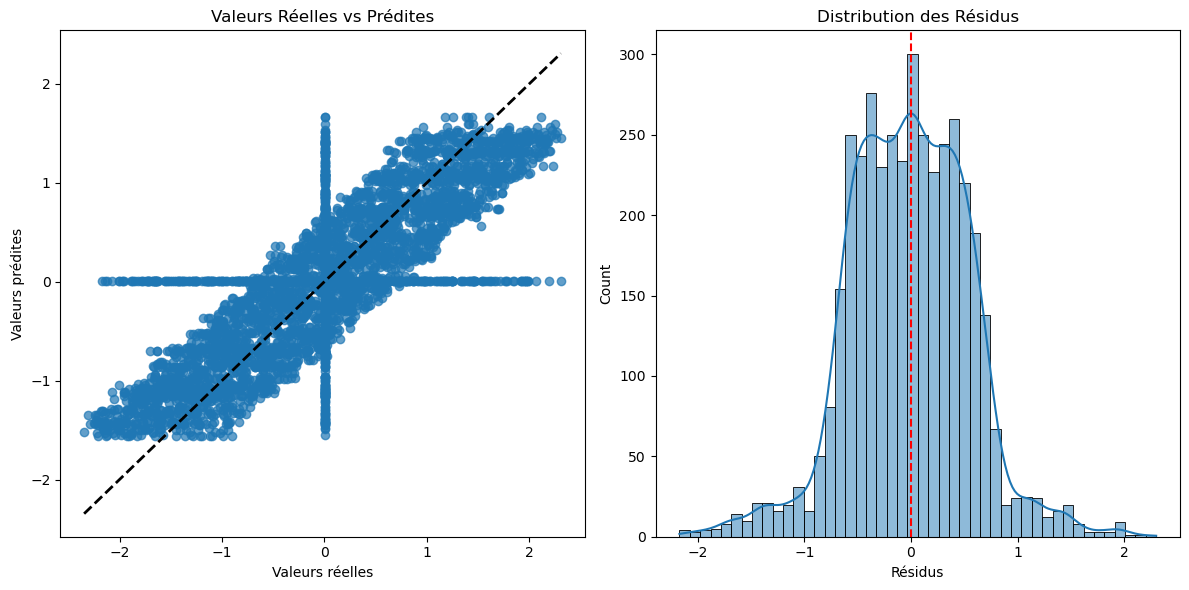

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supposons que y_test et y_pred_dt sont déjà définis
# 1. Graphique des valeurs réelles vs prédites
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs Réelles vs Prédites')

# 2. Graphique des résidus
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_rf
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Résidus')
plt.title('Distribution des Résidus')

plt.tight_layout()
plt.show()

In [130]:
print("Selected features:", selected_features)

Selected features: ['Quantity Donated']


In [131]:
import joblib

# Save the trained model
#joblib.dump(gbr, "demand_prediction_model.pkl")


In [132]:
model = joblib.load("demand_prediction_model.pkl")

In [133]:
print(type(model))

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


In [134]:
print(model) 

GradientBoostingRegressor(loss='huber', max_depth=4, n_estimators=300,
                          random_state=42)


<h1>finding out why the model is not performing well</h1>

In [135]:
residuals = df['Quantity Requested'] - df['Quantity Donated']

# Use IQR to identify outliers
Q1 = residuals.quantile(0.25)
Q3 = residuals.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_clean = df[(residuals >= lower_bound) & (residuals <= upper_bound)]
print(f"Original data size: {df.shape}")
print(f"Data size after removing outliers: {df_clean.shape}")

Original data size: (20000, 21)
Data size after removing outliers: (19392, 21)


In [136]:
# Prepare training data
X_train_clean = df_clean[['Quantity Donated', 'Food Waste Rate']]
y_train_clean = df_clean['Quantity Requested']

# Initialize and train the model
gbr = GradientBoostingRegressor(loss='huber', n_estimators=300, max_depth=4, random_state=42)
gbr.fit(X_train_clean, y_train_clean)

# Split the data for evaluation
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_clean, y_train_clean, test_size=0.2, random_state=42
)

# Predict on the test set
y_pred = gbr.predict(X_test_split)

# Compute new metrics
new_mae = mean_absolute_error(y_test_split, y_pred)
new_mse = mean_squared_error(y_test_split, y_pred)
new_r2 = r2_score(y_test_split, y_pred)

print(f"New Mean Absolute Error: {new_mae}")
print(f"New Mean Squared Error: {new_mse}")
print(f"New R-squared: {new_r2}")

New Mean Absolute Error: 0.371099717657761
New Mean Squared Error: 0.20726012504303243
New R-squared: 0.7855324483475599


In [137]:
# Correct Food Waste Rate (divide by 10 to bring it to 0-1 range)
df_clean['Food Waste Rate'] = df_clean['Food Waste Rate'] / 10

# Verify the new range
print("Food Waste Rate after correction:\n", df_clean['Food Waste Rate'].describe())

# Retrain the model
X_train_clean = df_clean[['Quantity Donated', 'Food Waste Rate']]
y_train_clean = df_clean['Quantity Requested']
gbr2 = GradientBoostingRegressor(loss='huber', n_estimators=300, max_depth=4, random_state=42)
gbr2.fit(X_train_clean, y_train_clean)

# Recompute metrics
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_clean, y_train_clean, test_size=0.2, random_state=42
)
y_pred = gbr.predict(X_test_split)
print(f"New MAE: {mean_absolute_error(y_test_split, y_pred)}")
print(f"New MSE: {mean_squared_error(y_test_split, y_pred)}")
print(f"New R²: {r2_score(y_test_split, y_pred)}")

Food Waste Rate after correction:
 count    19392.000000
mean         0.000090
std          0.100251
min         -0.127477
25%         -0.065454
50%         -0.013890
75%          0.038687
max          0.536678
Name: Food Waste Rate, dtype: float64
New MAE: 0.3893439026479054
New MSE: 0.22581395822806283
New R²: 0.7663334095737722


In [138]:
# Save the trained model
joblib.dump(gbr2, "demand_prediction_model2.pkl")

['demand_prediction_model2.pkl']

In [139]:
print(type(gbr2)) 

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
